In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from minisom import MiniSom

In [4]:
columns = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash ', 'magnesium', 
           'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 
           'hue', 'OD280/OD315_of_diluted_wines', 'proline']
df = pd.read_csv('./data/wine.data', names=columns)
df.head()

class  alcohol  malic_acid   ash  alcalinity_of_ash   magnesium  \
0      1    14.23        1.71  2.43                15.6        127   
1      1    13.20        1.78  2.14                11.2        100   
2      1    13.16        2.36  2.67                18.6        101   
3      1    14.37        1.95  2.50                16.8        113   
4      1    13.24        2.59  2.87                21.0        118   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   color_intensity   hue  OD280/OD315_of_diluted_wines  proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [8]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0:1].values.ravel()

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 15.200817946920873
 topographic error: 0.3595505617977528


Text(0.5, 1.0, 'Heatmap Wine\nlr: 0.5, sig: 3.0, erro_q: 15.20, erro_t: 0.36\nneighborhood_function: triangle')

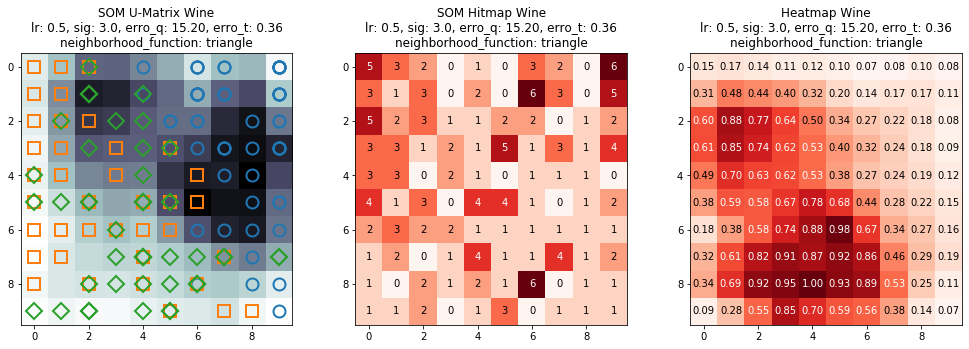

In [12]:
functions = ['gaussian', 'mexican_hat', 'bublle', 'triangle']
func, lr, sig = functions[3], 0.5, 3.0

som = MiniSom(x=10, y=10, input_len=13, sigma=sig, learning_rate=lr, random_seed=42, 
             neighborhood_function=func)
som.pca_weights_init(X)
som.train(X, num_iteration=1000, verbose=True)

# plots
fig, ax = plt.subplots(1, 3, figsize=(17, 5))
eq = som.quantization_error(X)
et = som.topographic_error(X)

#ax u-matrix
ax[0].imshow(som.distance_map().T, cmap='bone_r')
markers = {1: 'o', 2: 's', 3: 'D'}
colors = {1: 'C0', 2: 'C1', 3: 'C2'}

for i, x in enumerate(X):
    w = som.winner(x)
    marker = markers[y[i]]
    color = colors[y[i]]
    ax[0].plot(w[0], w[1], marker, markerfacecolor='None',
             markeredgecolor=color, markersize=12, markeredgewidth=2)
ax[0].set_title('SOM U-Matrix Wine\nlr: %s, sig: %s, erro_q: %.2f, erro_t: %.2f\nneighborhood_function: %s'%(lr, sig, eq, et, func))
# ax[0].set_xticks([]); ax[0].set_yticks([]);

#ax hitmap
freq = som.activation_response(X).astype(int)
cmap = ax[1].imshow(freq.T, cmap='Reds') 
for (i, j), z in np.ndenumerate(freq.T):
    color = 'w' if z > freq.T.max()/2 else 'k'
    ax[1].text(j, i, z, ha='center', va='center', color=color)
# ax[1].colorbar(cmap)
ax[1].set_title('SOM Hitmap Wine\nlr: %s, sig: %s, erro_q: %.2f, erro_t: %.2f\nneighborhood_function: %s'%(lr, sig, eq, et, func))

#ax heatmap
dm = som.distance_map()
ax[2].imshow(dm, cmap="Reds")
# ax[2].colorbar()
for i in range(dm.shape[0]):
    for j in range(dm.shape[1]):
        color = 'w' if dm[i][j] > dm.max()/2 else 'k'
        ax[2].text(j, i, '%.2f'%dm[i][j], ha='center', va='center', color=color)
ax[2].set_title('Heatmap Wine\nlr: %s, sig: %s, erro_q: %.2f, erro_t: %.2f\nneighborhood_function: %s'%(lr, sig, eq, et, func))

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 172.17550310599012
 topographic error: 0.48314606741573035


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 154.0026844917705
 topographic error: 0.43258426966292135


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 251.05002376629852
 topographic error: 0.3707865168539326


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 23.756532655512945
 topographic error: 0.43258426966292135


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 137.91475855793414
 topographic error: 0.3707865168539326


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 214.4290631887005
 topographic error: 0.38202247191011235


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 18.15197793862979
 topographic error: 0.29213483146067415


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 159.29905675845964
 topographic error: 0.5224719101123596


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 203.61162188930555
 topographic error: 0.48314606741573035


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 2648.7932042329685
 topographic error: 1.0


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 945.4461486078778
 topographic error: 0.8595505617977528


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 202.80436212073874
 topographic error: 0.9662921348314607


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 2002.8542157925317
 topographic error: 1.0


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1735.1051344279615
 topographic error: 0.9719101123595506


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 402.37188098902743
 topographic error: 0.15730337078651685


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 7622.497797096575
 topographic error: 1.0


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 7967.052729775593
 topographic error: 0.0


 [  869 / 1000 ]  87% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 3862.7676119029607
 topographic error: 0.4943820224719101
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1859.3053567478628
 topographic error: 0.0
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 154.82981654571958
 topographic error: 0.28651685393258425
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 143.65907628096429
 topographic error: 0.4157303370786517


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1301.6811095912292
 topographic error: 0.0


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 19.189900220363885
 topographic error: 0.4438202247191011


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 66.44538847249892
 topographic error: 0.48314606741573035


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 642.8435283224046
 topographic error: 0.6123595505617978


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 26.7273100620279
 topographic error: 0.3651685393258427


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 133.3127790208647
 topographic error: 0.33146067415730335


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1980.6234669623818
 topographic error: 0.0


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 158.7788418430179
 topographic error: 0.24157303370786518


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 40.01091366244549
 topographic error: 0.4157303370786517


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1036.8227845204221
 topographic error: 0.0


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 19.56044395271904
 topographic error: 0.43258426966292135


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 19.179357978538118
 topographic error: 0.4438202247191011


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1238.3536288634964
 topographic error: 0.011235955056179775


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 6.996129087510305
 topographic error: 0.6460674157303371


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 15.47545401829701
 topographic error: 0.3539325842696629


/home/adriano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


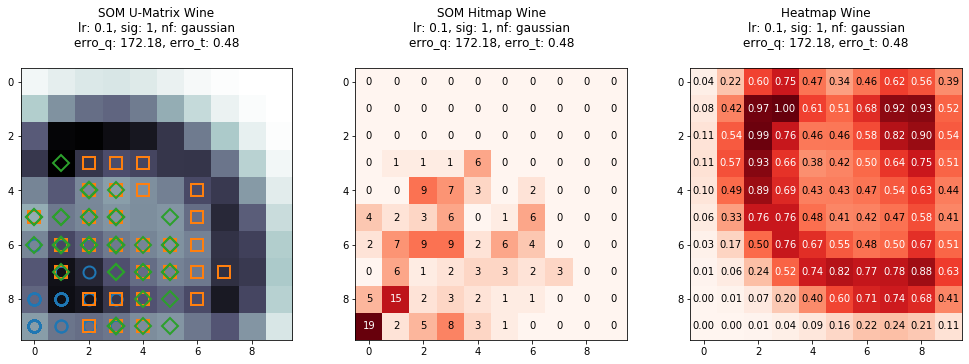

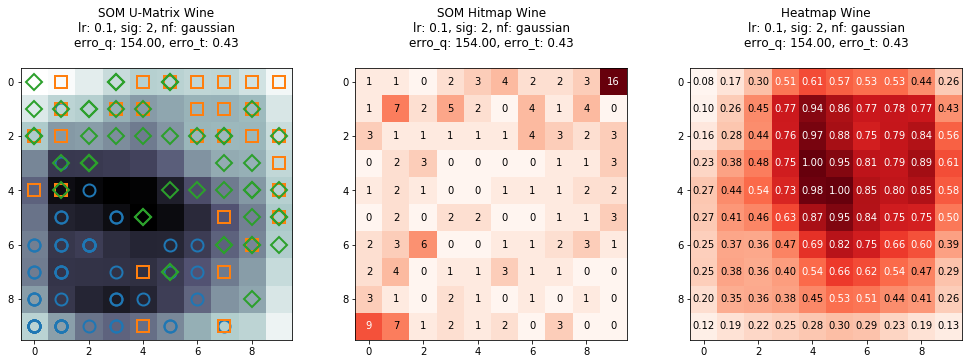

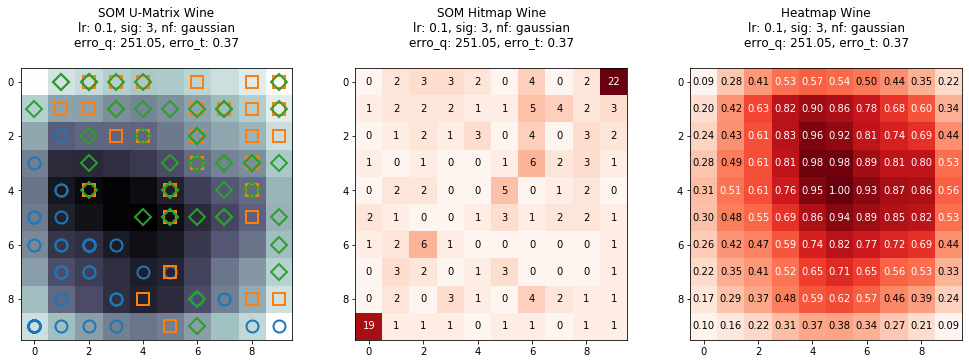

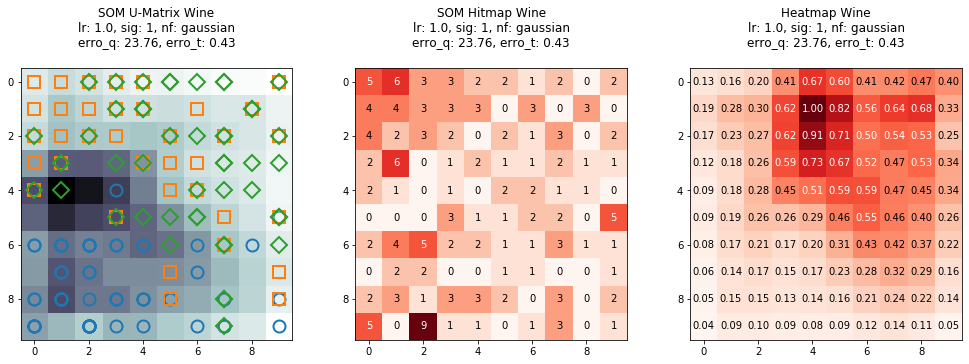

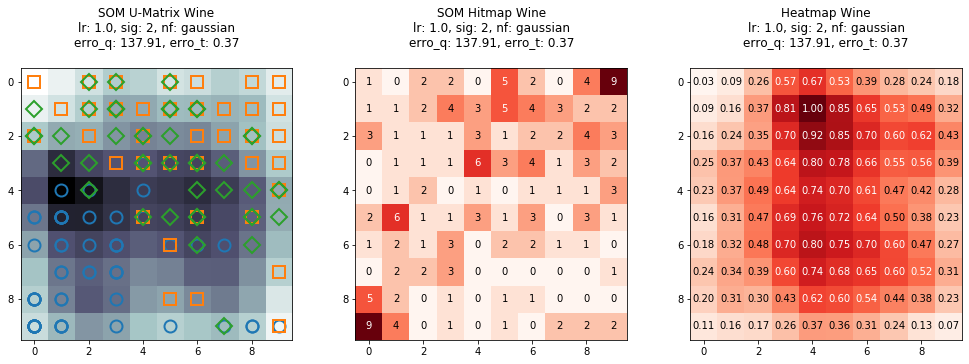

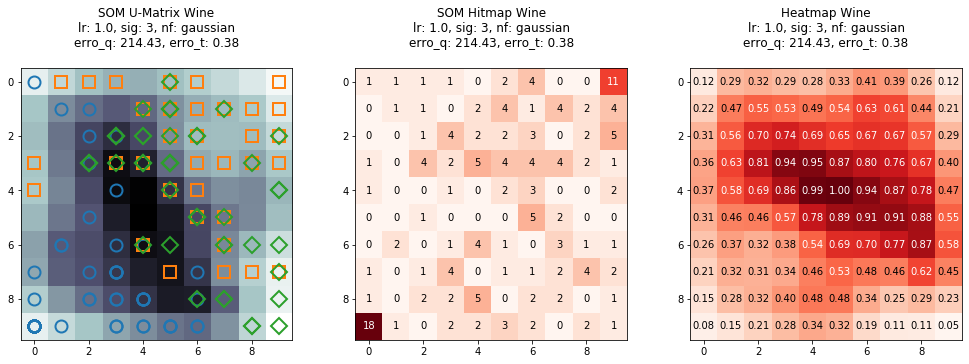

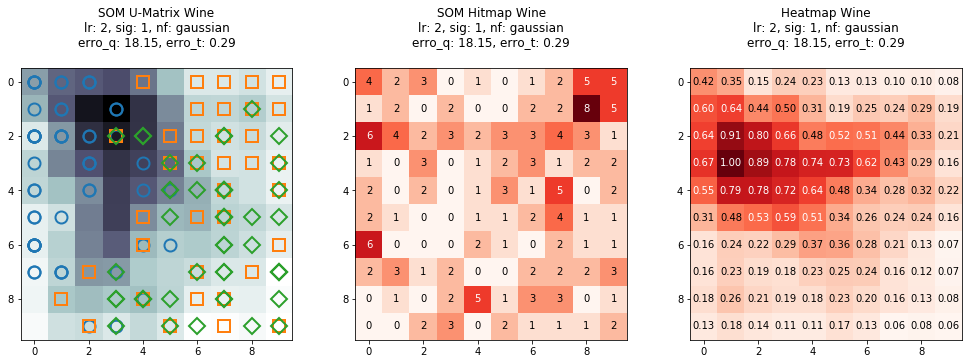

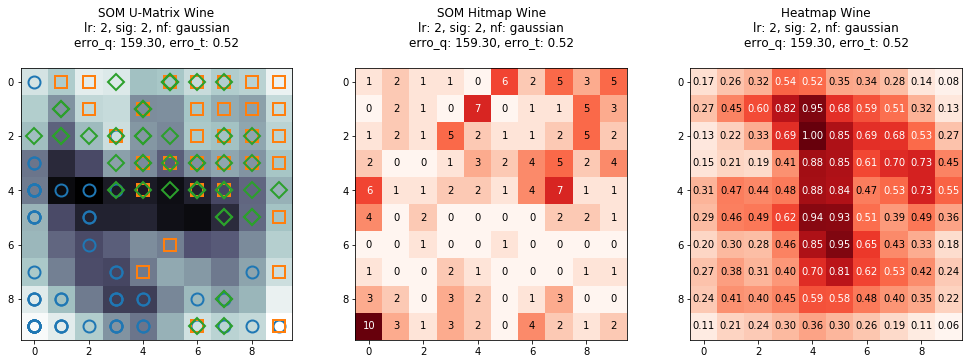

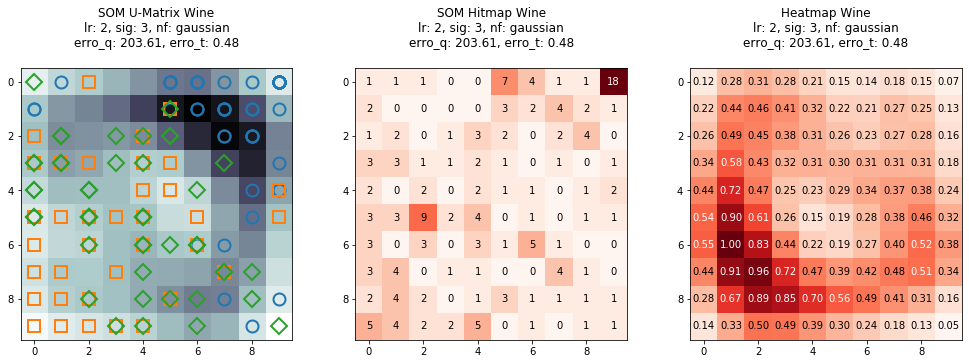

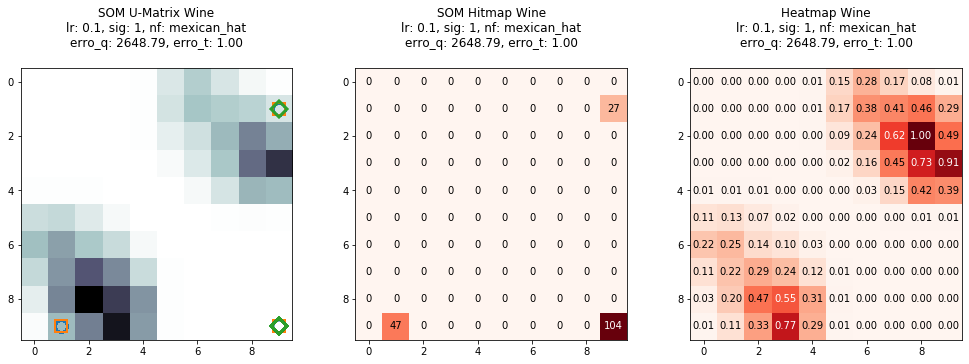

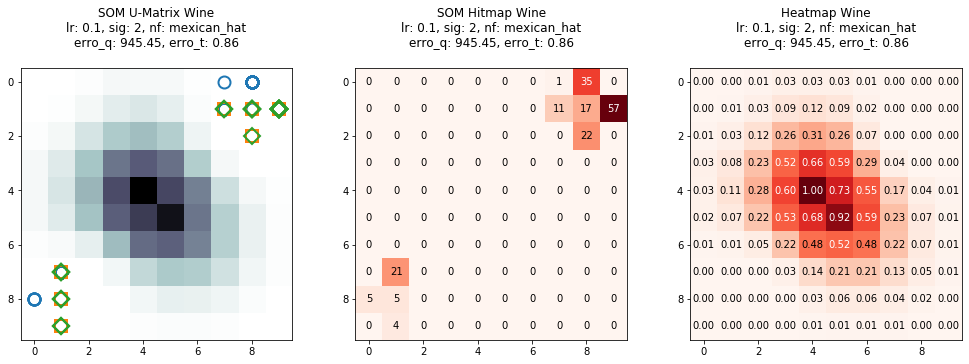

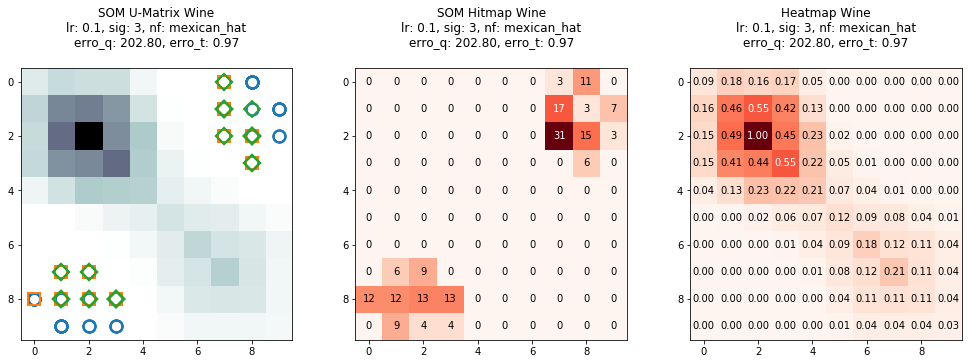

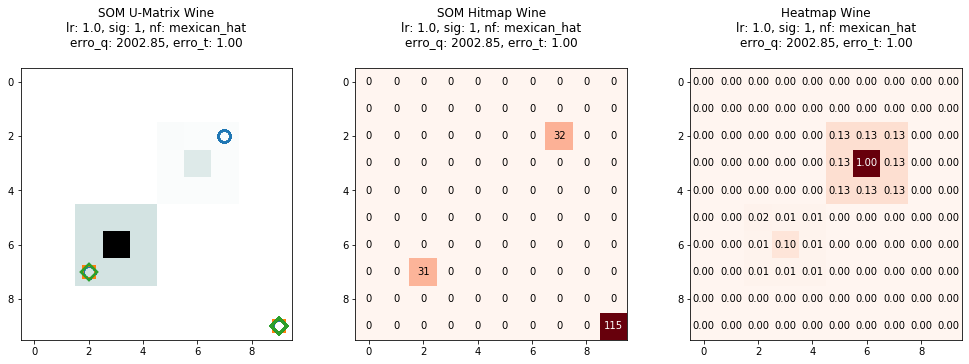

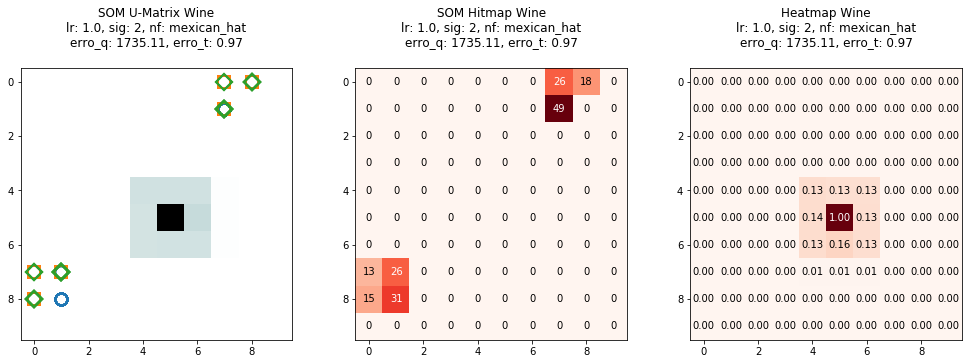

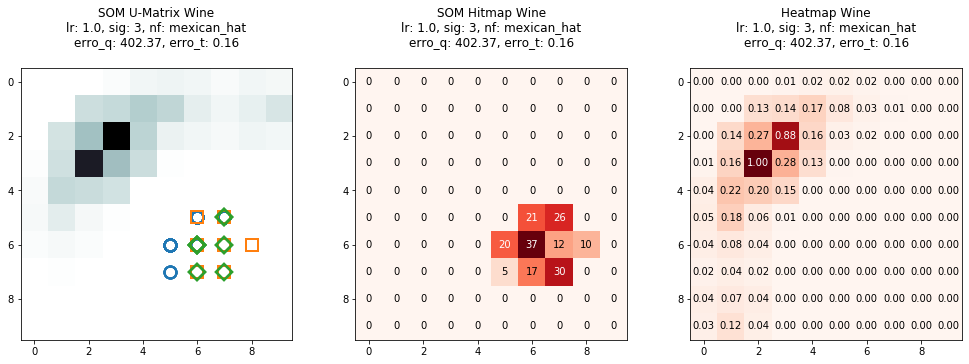

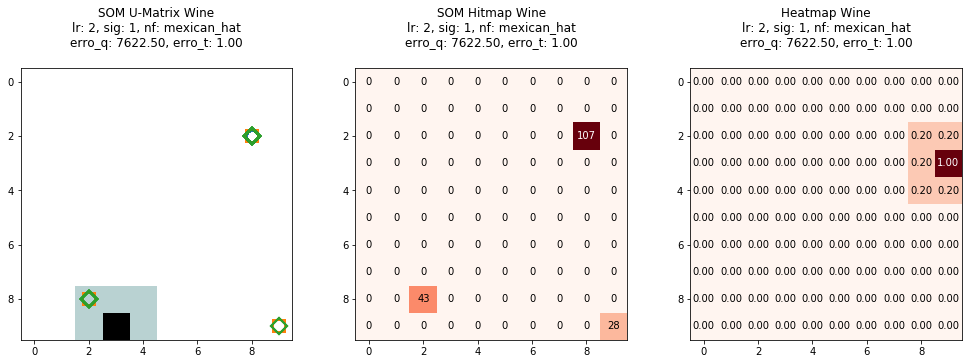

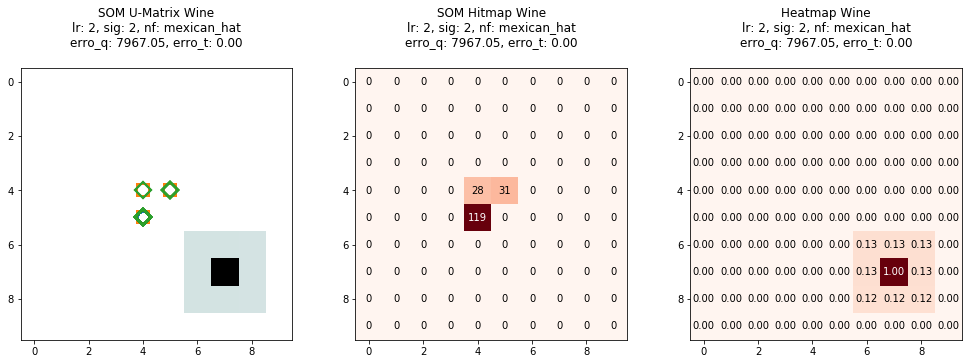

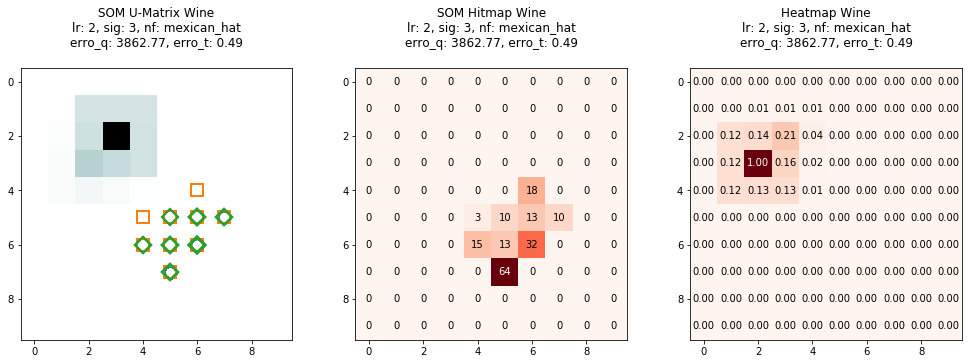

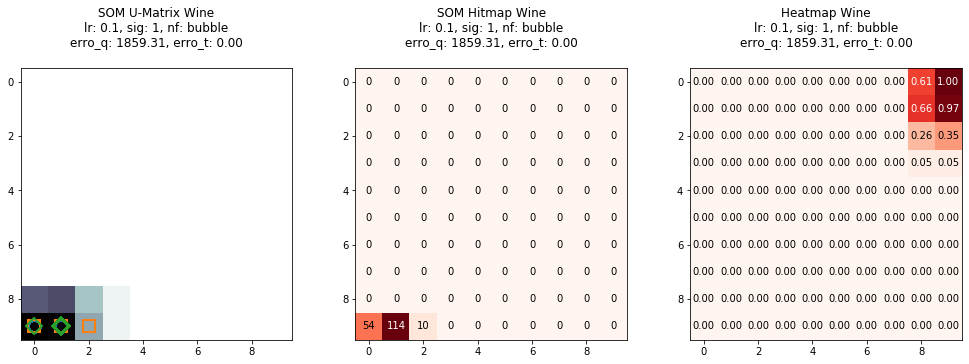

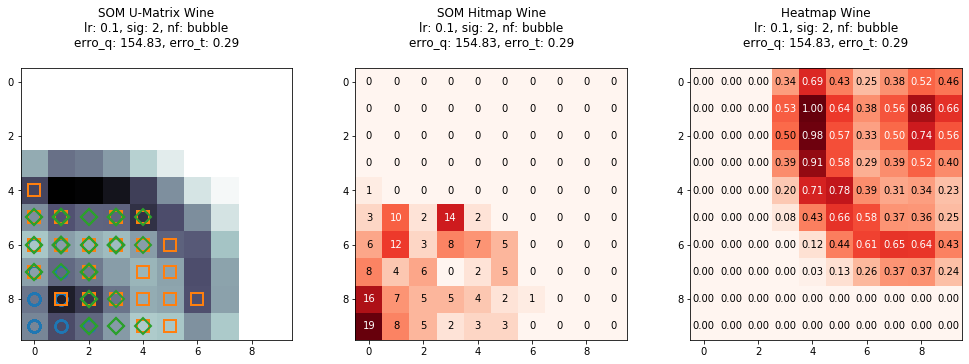

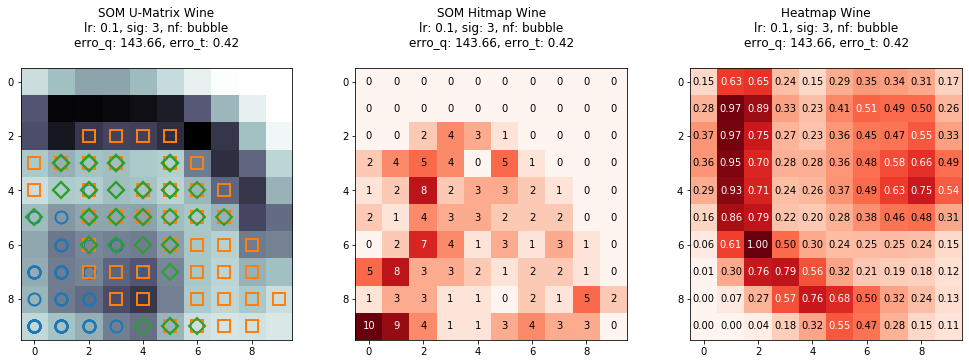

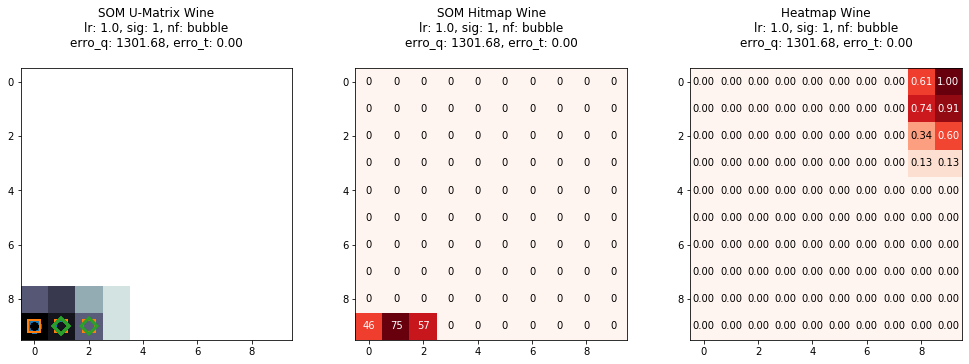

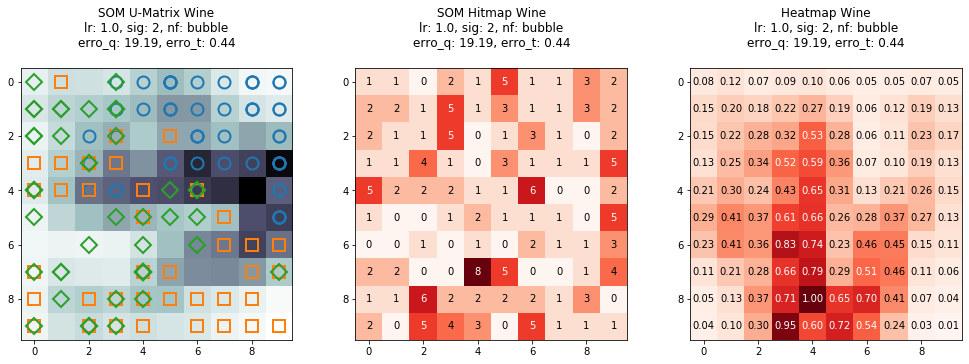

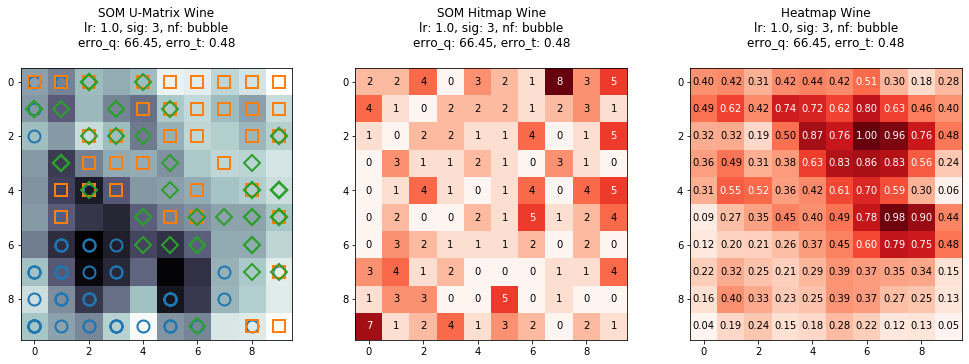

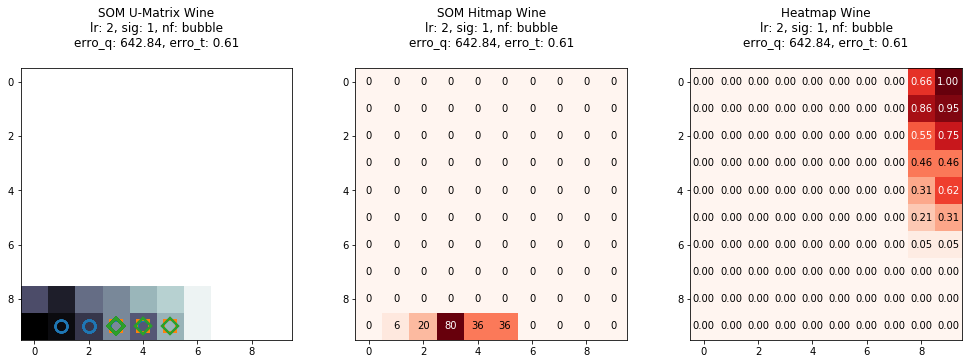

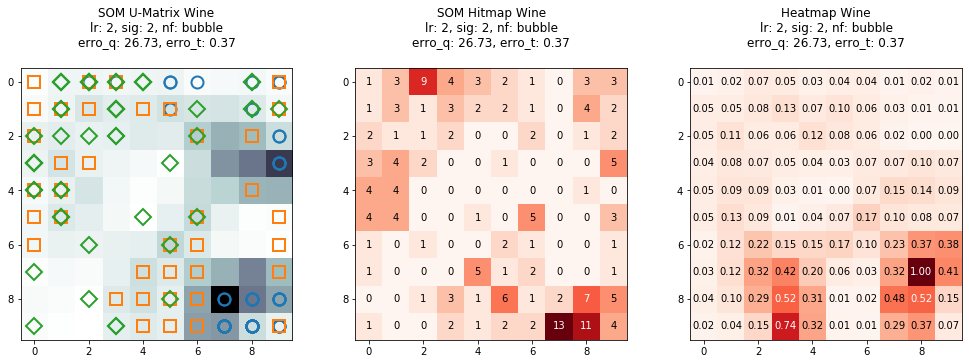

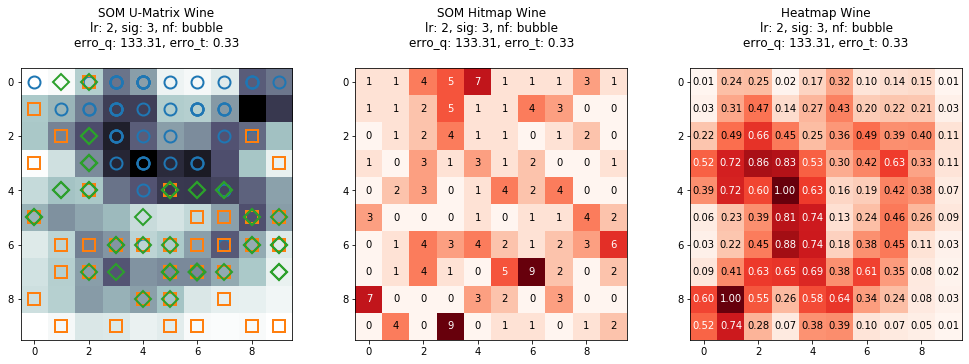

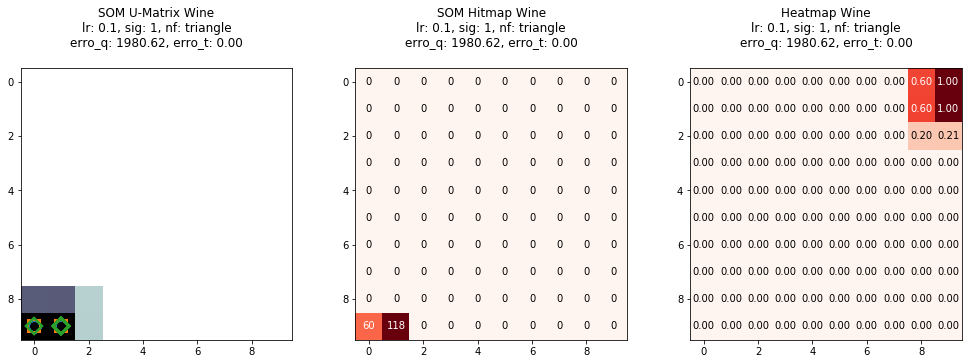

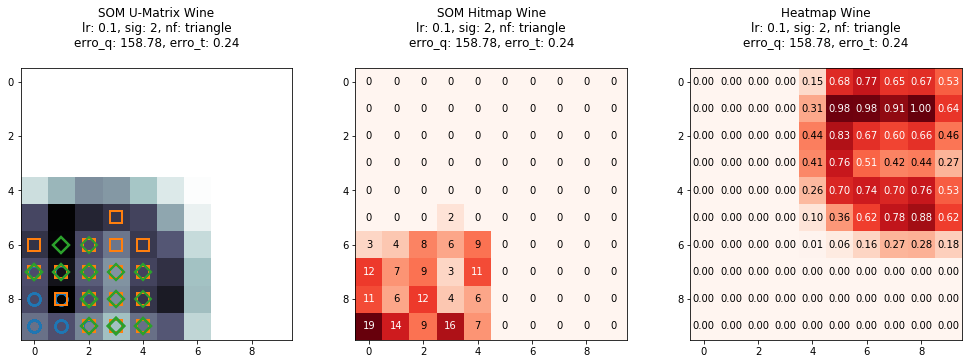

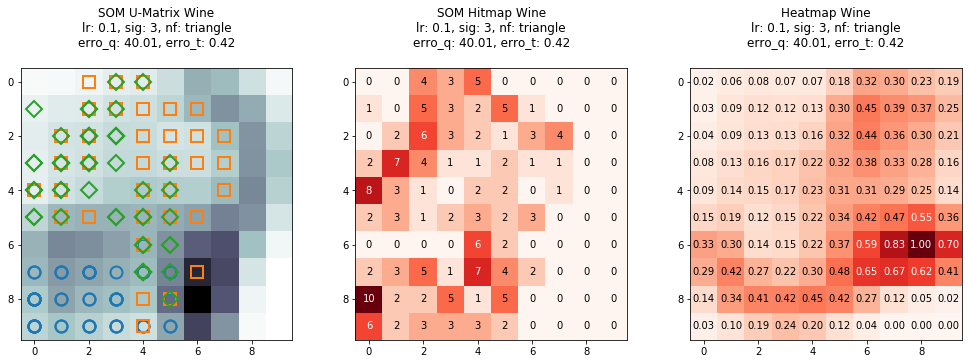

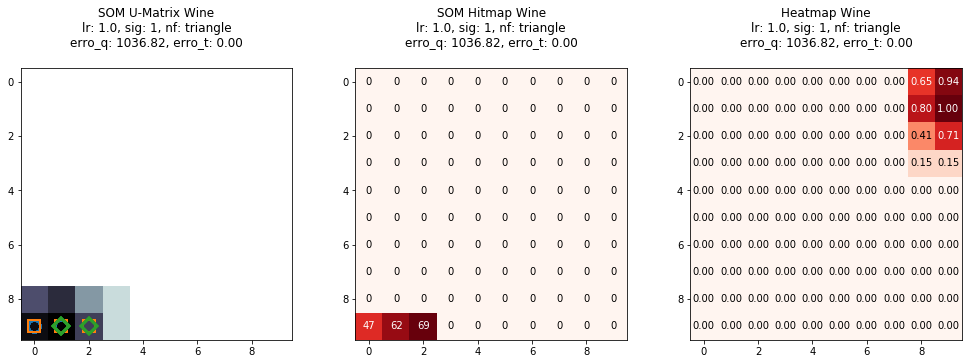

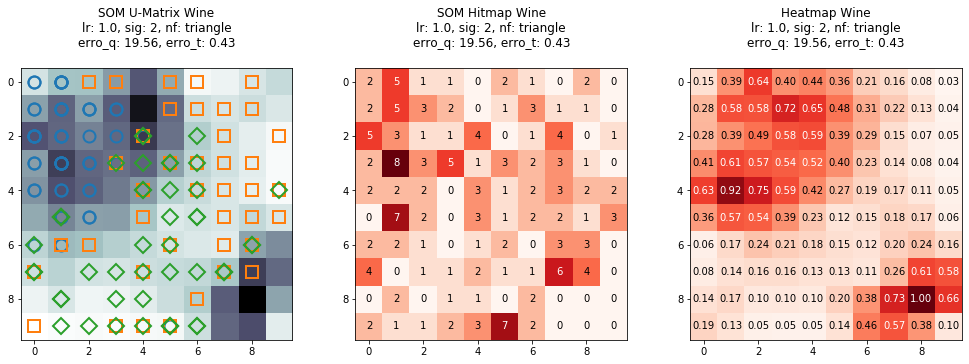

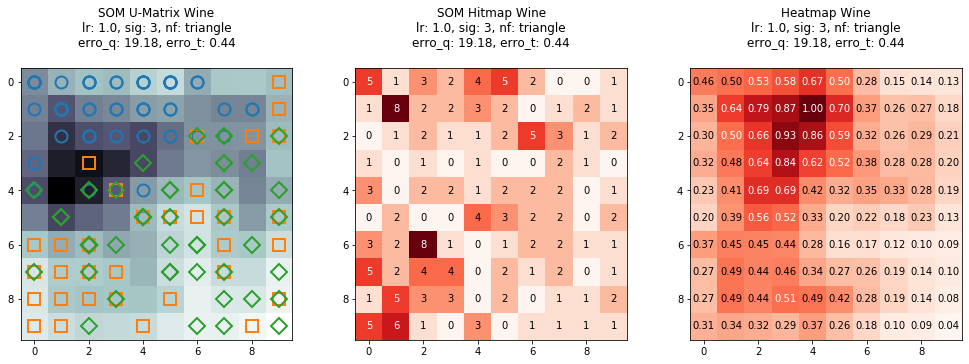

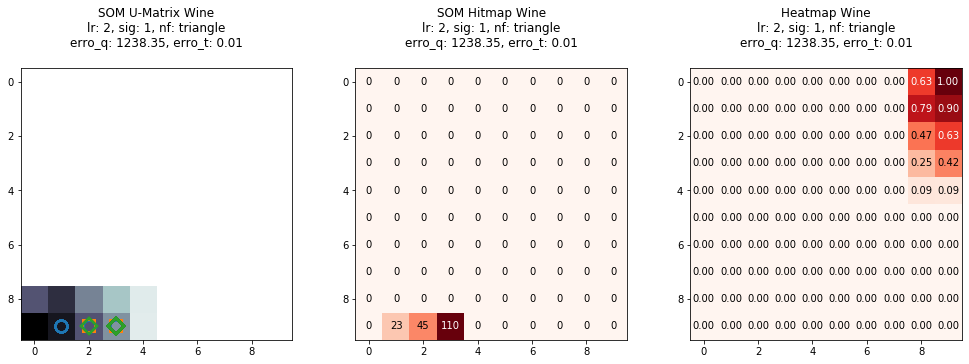

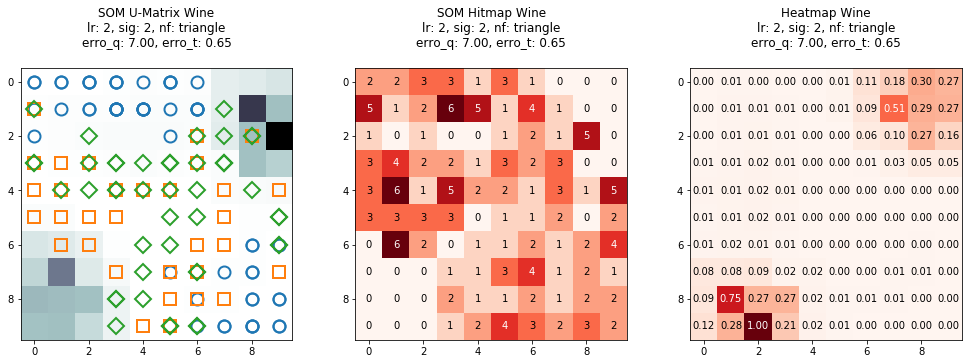

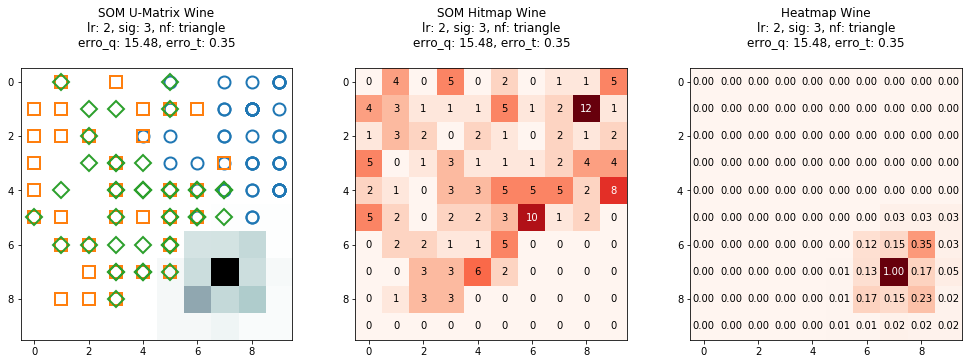

In [14]:
def run_som(func, lr, sig):
    som = MiniSom(x=10, y=10, input_len=13, sigma=sig, learning_rate=lr, random_seed=42, 
             neighborhood_function=func)
    som.pca_weights_init(X)
    som.train(X, num_iteration=1000, verbose=True)

    # plots
    fig, ax = plt.subplots(1, 3, figsize=(17, 5))
    eq = som.quantization_error(X)
    et = som.topographic_error(X)

    #ax u-matrix
    ax[0].imshow(som.distance_map().T, cmap='bone_r')
    markers = {1: 'o', 2: 's', 3: 'D'}
    colors = {1: 'C0', 2: 'C1', 3: 'C2'}
    for i, x in enumerate(X):
        w = som.winner(x)
        marker = markers[y[i]]
        color = colors[y[i]]
        ax[0].plot(w[0], w[1], marker, markerfacecolor='None',
                 markeredgecolor=color, markersize=12, markeredgewidth=2)
    ax[0].set_title('SOM U-Matrix Wine\nlr: %s, sig: %s, nf: %s\nerro_q: %.2f, erro_t: %.2f\n'%
                    (lr, sig, func, eq, et))
    # ax[0].set_xticks([]); ax[0].set_yticks([]);

    #ax hitmap
    freq = som.activation_response(X).astype(int)
    cmap = ax[1].imshow(freq.T, cmap='Reds') 
    for (i, j), z in np.ndenumerate(freq.T):
        color = 'w' if z > freq.T.max()/2 else 'k'
        ax[1].text(j, i, z, ha='center', va='center', color=color)
    # ax[1].colorbar(cmap)
    ax[1].set_title('SOM Hitmap Wine\nlr: %s, sig: %s, nf: %s\nerro_q: %.2f, erro_t: %.2f\n'%
                    (lr, sig, func, eq, et))

    #ax heatmap
    dm = som.distance_map()
    ax[2].imshow(dm, cmap="Reds")
    # ax[2].colorbar()
    for i in range(dm.shape[0]):
        for j in range(dm.shape[1]):
            color = 'w' if dm[i][j] > dm.max()/2 else 'k'
            ax[2].text(j, i, '%.2f'%dm[i][j], ha='center', va='center', color=color)
    ax[2].set_title('Heatmap Wine\nlr: %s, sig: %s, nf: %s\nerro_q: %.2f, erro_t: %.2f\n'%
                    (lr, sig, func, eq, et))
    plt.savefig('results/som_003_f%s_lr%s_sig%s.pdf'%(func, lr, sig), dpi=600, bbox_inches='tight', 
                    transparent=False, pad_inches=0.1)

funcs = ['gaussian', 'mexican_hat', 'bubble', 'triangle']
lrs = [0.1, 1.0, 2]
sigs = [1, 2, 3]

for func in funcs:
    for lr in lrs:
        for sig in sigs:
            run_som(func, lr, sig)